# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Fetching Data

In [2]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

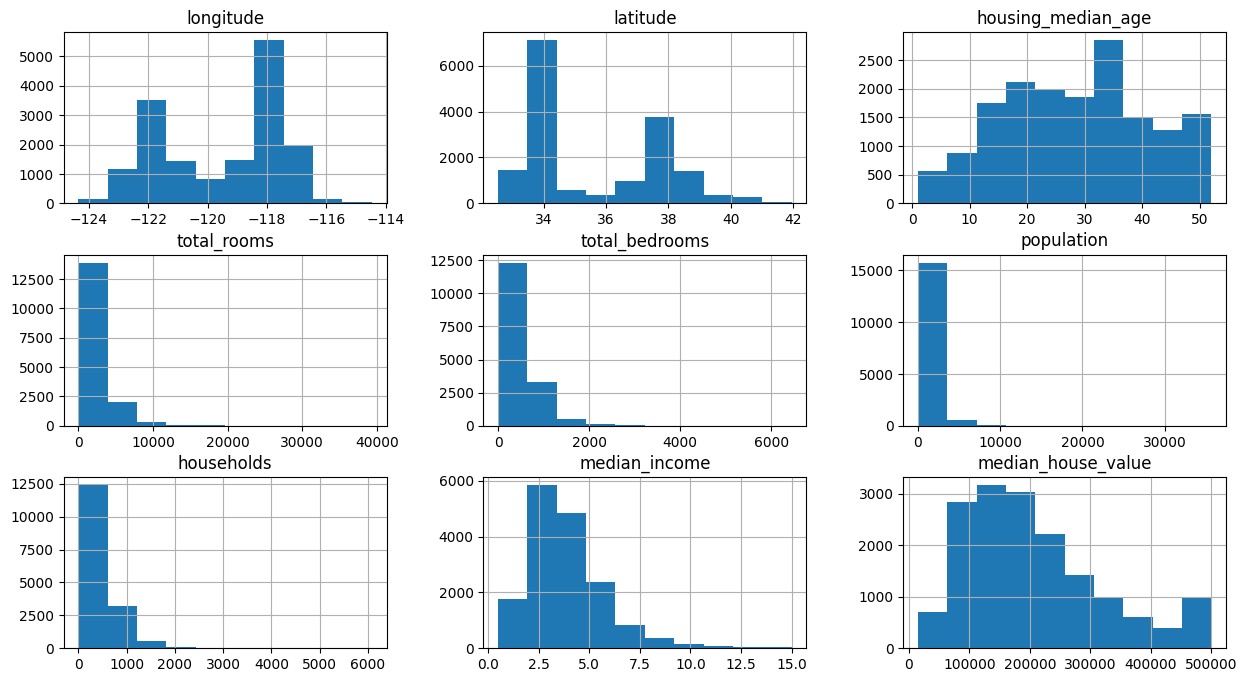

In [8]:
train_data.hist(figsize=(15,8))

In [9]:
train_data.drop(['ocean_proximity'], axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925384,-0.107301,0.042383,0.065866,0.097727,0.051994,-0.013426,-0.043980
latitude,-0.925384,1.000000,0.009682,-0.033579,-0.062995,-0.105075,-0.066697,-0.081311,-0.144490
housing_median_age,-0.107301,0.009682,1.000000,-0.355133,-0.313787,-0.290371,-0.295829,-0.120817,0.108116
total_rooms,0.042383,-0.033579,-0.355133,1.000000,0.929876,0.856418,0.918673,0.198858,0.134945
total_bedrooms,0.065866,-0.062995,-0.313787,0.929876,1.000000,0.875790,0.979617,-0.007780,0.049910
population,0.097727,-0.105075,-0.290371,0.856418,0.875790,1.000000,0.905682,0.004447,-0.024662
households,0.051994,-0.066697,-0.295829,0.918673,0.979617,0.905682,1.000000,0.013029,0.064732
median_income,-0.013426,-0.081311,-0.120817,0.198858,-0.007780,0.004447,0.013029,1.000000,0.689830
median_house_value,-0.043980,-0.144490,0.108116,0.134945,0.049910,-0.024662,0.064732,0.689830,1.000000


<Axes: >

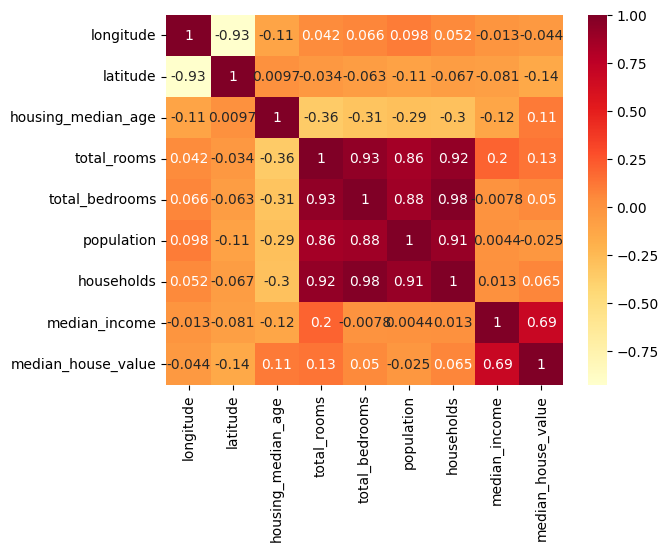

In [10]:
sns.heatmap(train_data.drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap="YlOrRd")

# Data Preprocessing

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

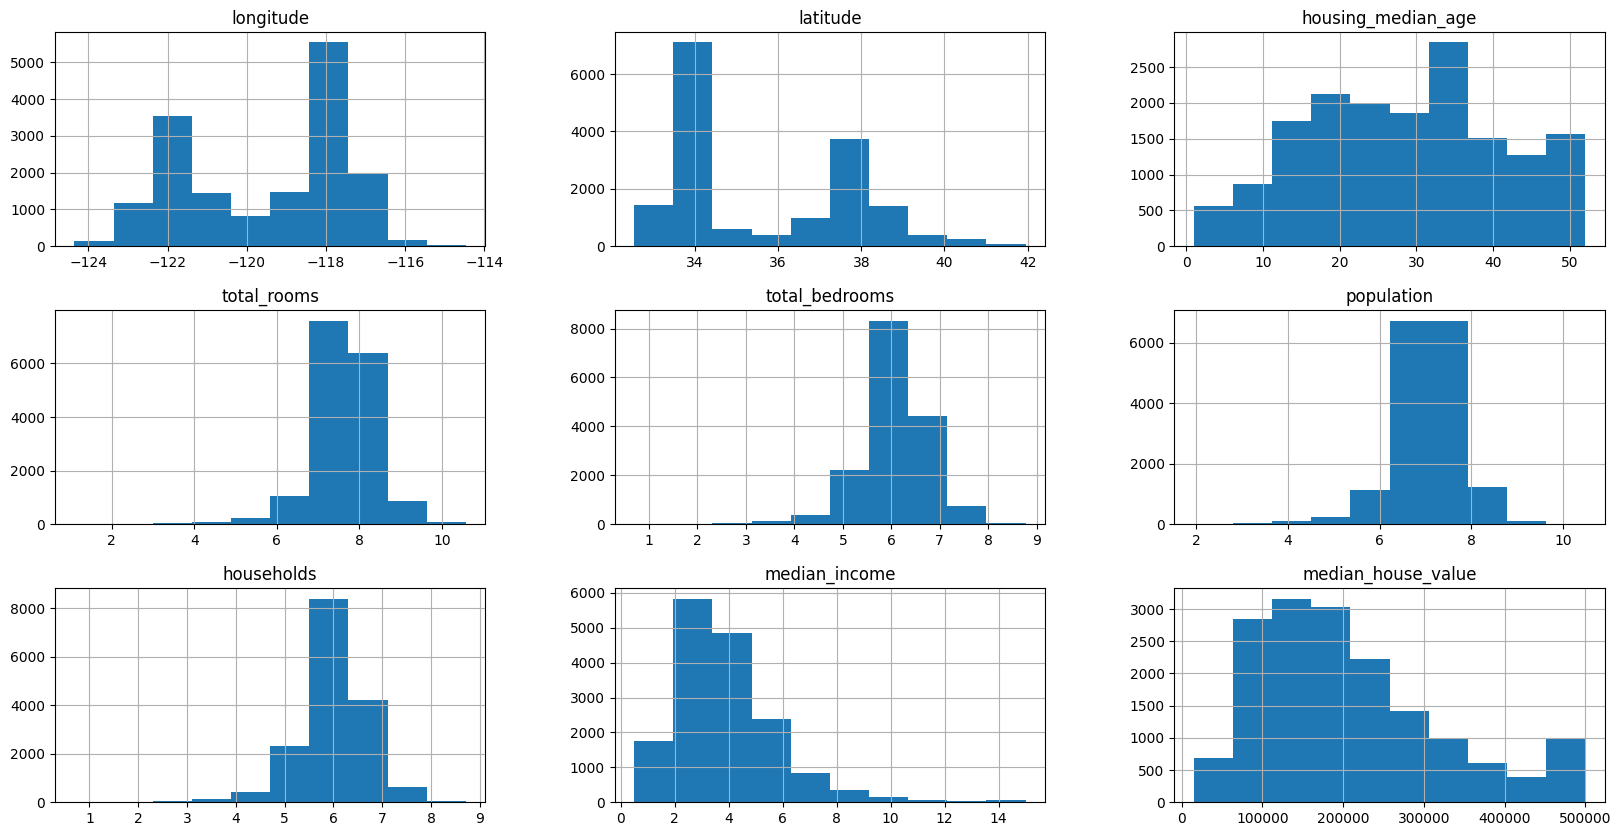

In [11]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

train_data.hist(figsize=(20, 10))

In [12]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

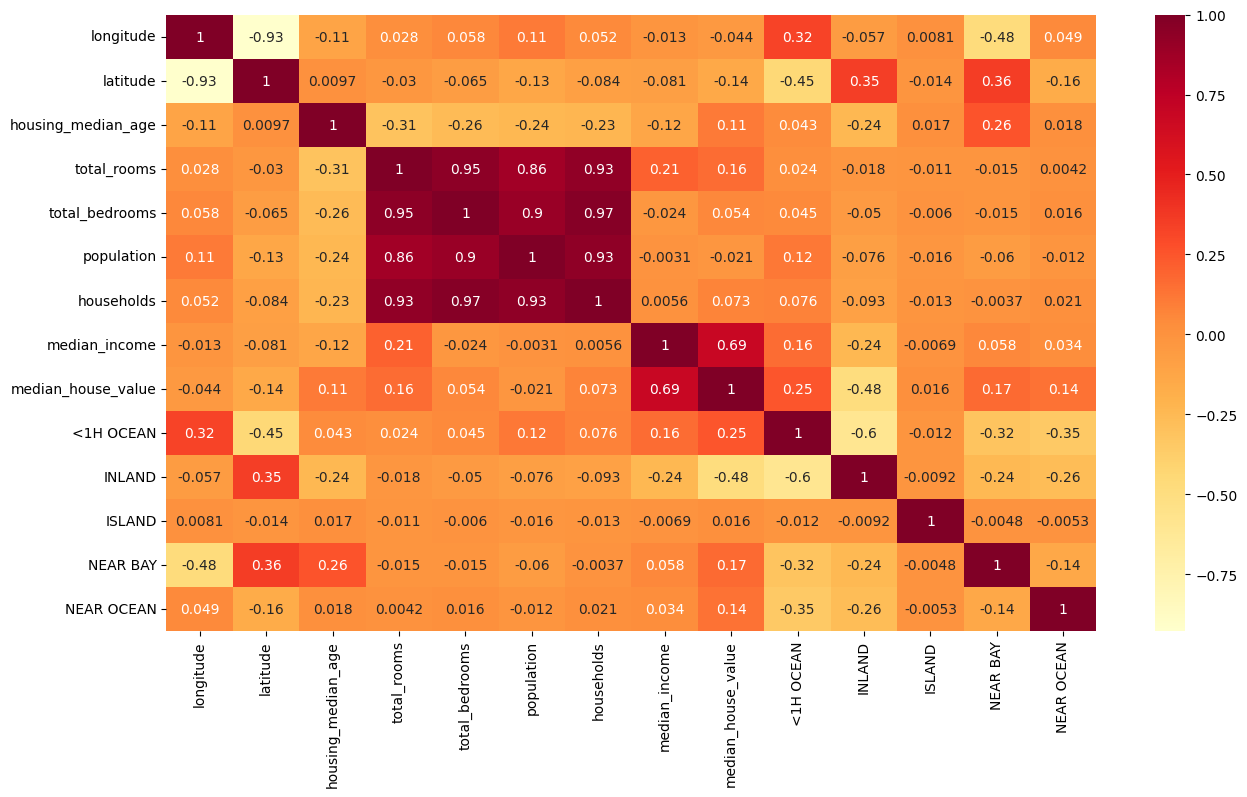

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")

<Axes: xlabel='longitude', ylabel='latitude'>

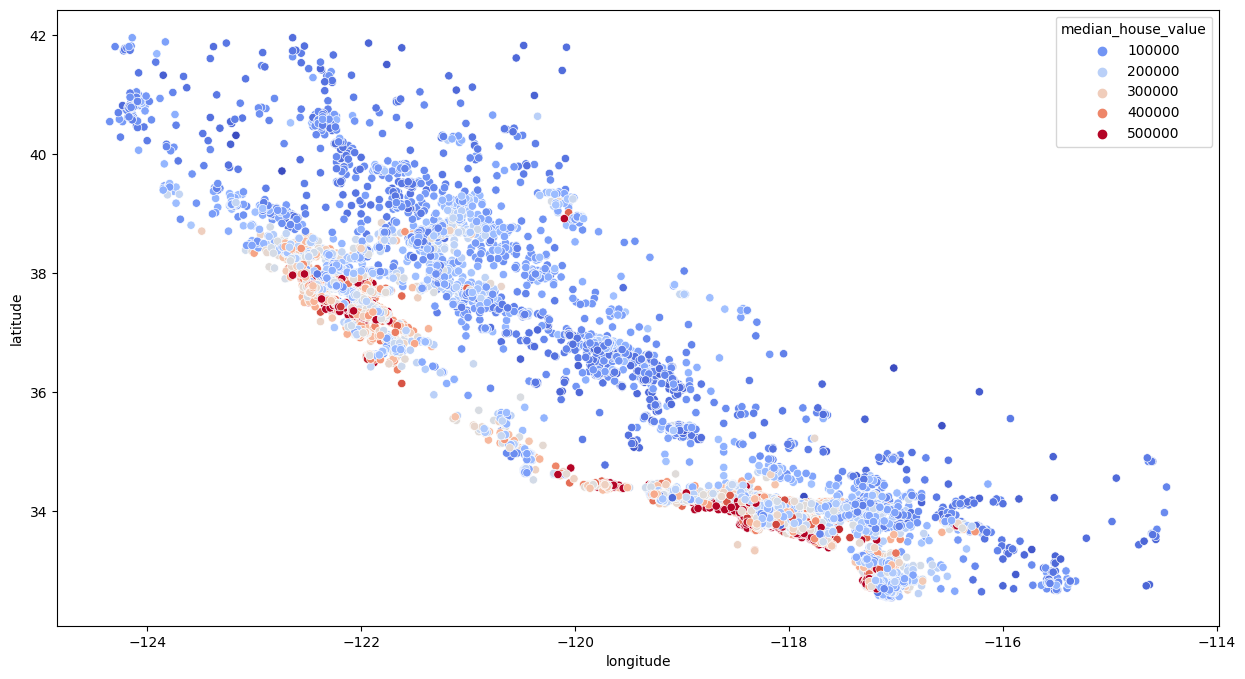

In [14]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="longitude", y="latitude", data=train_data, hue="median_house_value", palette="coolwarm")

# Feature Engineering

In [15]:
train_data['total_bedrooms_per_rooms'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['total_rooms_per_households'] = train_data['total_rooms'] / train_data['households']

test_data['total_bedrooms_per_rooms'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['total_rooms_per_households'] = test_data['total_rooms'] / test_data['households']

<Axes: >

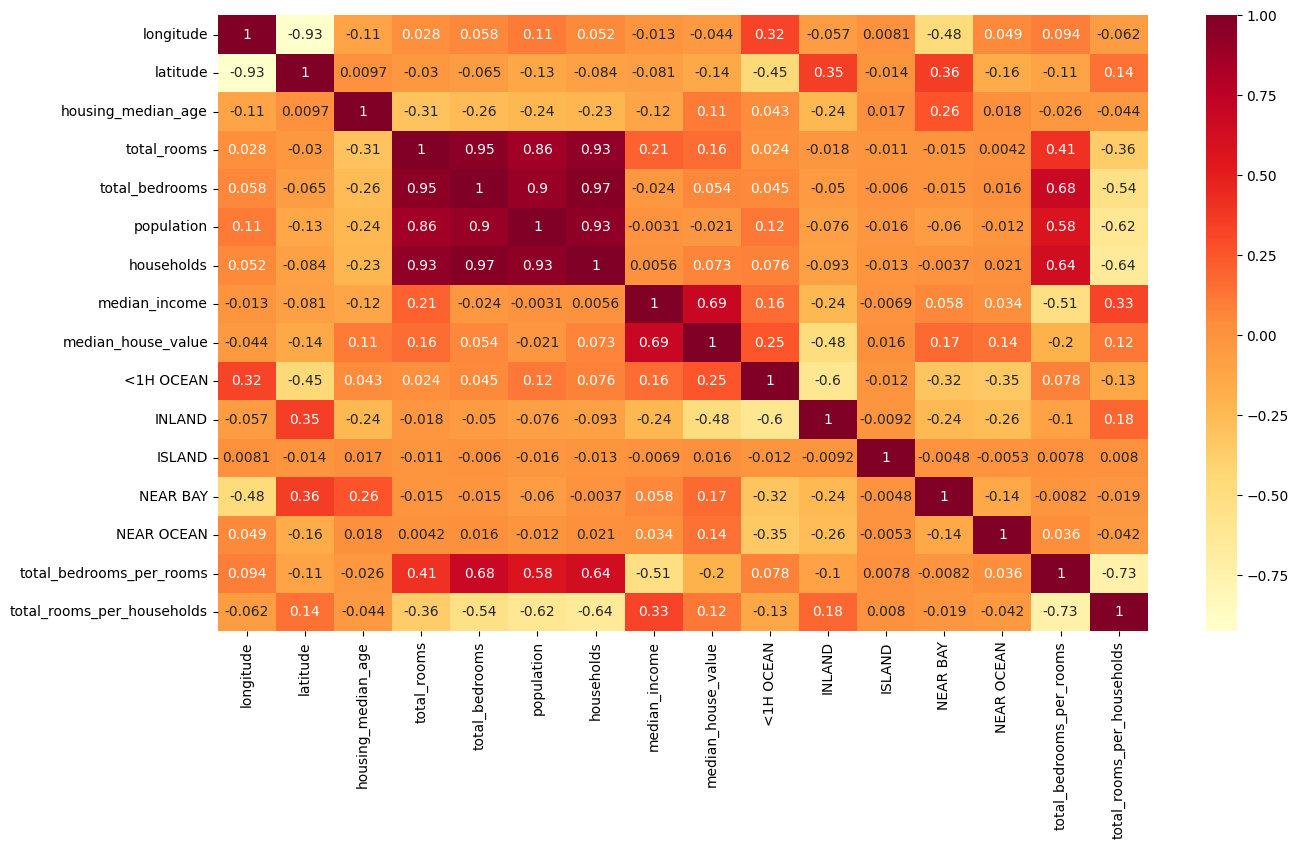

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")

In [17]:
X_train = train_data.drop(["median_house_value"], axis=1)
y_train = train_data["median_house_value"]

X_test = test_data.drop(["median_house_value"], axis=1)
y_test = test_data["median_house_value"]

# Linear Regression Model Training

In [18]:
model = LinearRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
model.score(X_test_scaled, y_test)

0.6639437313654308

# Random Forest Model Training

In [20]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
forest.score(X_test, y_test)

0.8200019014998992